Instalación de la librería "procyclingstats" e importación del resto de librerías necesarias para la realización del proyecto 

In [ ]:
pip install procyclingstats

In [3]:
from procyclingstats import RaceClimbs
from procyclingstats import Race
from procyclingstats import Stage
from procyclingstats import RaceStartlist
import requests
from bs4 import BeautifulSoup
import pandas as pd
import dtale
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
# from urllib.request import urlopen
# import random
# import re
# import scrapy

Accedemos al database de dicha página, y más concretamente, al apartado de "startlist" para recabar la lista de participantes en el Tour de Francia 2023

In [4]:
race_startlist = RaceStartlist("race/tour-de-france/2023/startlist")
startlist = race_startlist.startlist()

len(startlist)



176

In [5]:
# Crear un dataframe con los datos de tour de france

startlist_df = pd.DataFrame(startlist)

startlist_df

,rider_name,rider_url,nationality,rider_number,team_name,team_url
0,VINGEGAARD Jonas,rider/jonas-vingegaard-rasmussen,DK,1,Jumbo-Visma (WT),team/team-jumbo-visma-2023
1,BENOOT Tiesj,rider/tiesj-benoot,BE,2,Jumbo-Visma (WT),team/team-jumbo-visma-2023
2,KELDERMAN Wilco,rider/wilco-kelderman,NL,3,Jumbo-Visma (WT),team/team-jumbo-visma-2023
3,KUSS Sepp,rider/sepp-kuss,US,4,Jumbo-Visma (WT),team/team-jumbo-visma-2023
4,LAPORTE Christophe,rider/christophe-laporte,FR,5,Jumbo-Visma (WT),team/team-jumbo-visma-2023
...,...,...,...,...,...,...
171,CRAS Steff,rider/steff-cras,BE,214,TotalEnergies (PRT),team/team-totalenergies-2023
172,FERRON Valentin,rider/valentin-ferron,FR,215,TotalEnergies (PRT),team/team-totalenergies-2023
173,LATOUR Pierre,rider/pierre-latour,FR,216,TotalEnergies (PRT),team/team-totalenergies-2023
174,OSS Daniel,rider/daniel-oss,IT,217,TotalEnergies (PRT),team/team-totalenergies-2023


Procederemos a anlizar el dataframe e iniciar su limpieza

In [6]:
# Ver la información del dataframe

startlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rider_name    176 non-null    object
 1   rider_url     176 non-null    object
 2   nationality   176 non-null    object
 3   rider_number  176 non-null    int64 
 4   team_name     176 non-null    object
 5   team_url      176 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.4+ KB


In [7]:
# Comprobar si hay duplicados

startlist_df.duplicated().sum()

0

In [8]:
# Eliminar las columnas "rider_url","team_url" y "rider_number"

startlist_df = startlist_df.drop(["rider_url","team_url","rider_number"], axis=1)

startlist_df

,rider_name,nationality,team_name
0,VINGEGAARD Jonas,DK,Jumbo-Visma (WT)
1,BENOOT Tiesj,BE,Jumbo-Visma (WT)
2,KELDERMAN Wilco,NL,Jumbo-Visma (WT)
3,KUSS Sepp,US,Jumbo-Visma (WT)
4,LAPORTE Christophe,FR,Jumbo-Visma (WT)
...,...,...,...
171,CRAS Steff,BE,TotalEnergies (PRT)
172,FERRON Valentin,FR,TotalEnergies (PRT)
173,LATOUR Pierre,FR,TotalEnergies (PRT)
174,OSS Daniel,IT,TotalEnergies (PRT)


In [9]:
# Crear una columna llamada rider_name_id que se obtenga de la columna "rider_name" y que contenga el id del ciclista

startlist_df["rider_name_id"] = startlist_df["rider_name"].str.split("/").str[2]

startlist_df

,rider_name,nationality,team_name,rider_name_id
0,VINGEGAARD Jonas,DK,Jumbo-Visma (WT),NaN
1,BENOOT Tiesj,BE,Jumbo-Visma (WT),NaN
2,KELDERMAN Wilco,NL,Jumbo-Visma (WT),NaN
3,KUSS Sepp,US,Jumbo-Visma (WT),NaN
4,LAPORTE Christophe,FR,Jumbo-Visma (WT),NaN
...,...,...,...,...
171,CRAS Steff,BE,TotalEnergies (PRT),NaN
172,FERRON Valentin,FR,TotalEnergies (PRT),NaN
173,LATOUR Pierre,FR,TotalEnergies (PRT),NaN
174,OSS Daniel,IT,TotalEnergies (PRT),NaN


In [10]:
# Llenar la columna "rider_name_id" con numeros del 1 al 176

startlist_df["rider_name_id"] = range(1, len(startlist_df) + 1)

startlist_df

,rider_name,nationality,team_name,rider_name_id
0,VINGEGAARD Jonas,DK,Jumbo-Visma (WT),1
1,BENOOT Tiesj,BE,Jumbo-Visma (WT),2
2,KELDERMAN Wilco,NL,Jumbo-Visma (WT),3
3,KUSS Sepp,US,Jumbo-Visma (WT),4
4,LAPORTE Christophe,FR,Jumbo-Visma (WT),5
...,...,...,...,...
171,CRAS Steff,BE,TotalEnergies (PRT),172
172,FERRON Valentin,FR,TotalEnergies (PRT),173
173,LATOUR Pierre,FR,TotalEnergies (PRT),174
174,OSS Daniel,IT,TotalEnergies (PRT),175


In [11]:
# Poner la columna "rider_name_id" al principio del dataframe

startlist_df = startlist_df[["rider_name_id","rider_name","nationality","team_name"]]

startlist_df

,rider_name_id,rider_name,nationality,team_name
0,1,VINGEGAARD Jonas,DK,Jumbo-Visma (WT)
1,2,BENOOT Tiesj,BE,Jumbo-Visma (WT)
2,3,KELDERMAN Wilco,NL,Jumbo-Visma (WT)
3,4,KUSS Sepp,US,Jumbo-Visma (WT)
4,5,LAPORTE Christophe,FR,Jumbo-Visma (WT)
...,...,...,...,...
171,172,CRAS Steff,BE,TotalEnergies (PRT)
172,173,FERRON Valentin,FR,TotalEnergies (PRT)
173,174,LATOUR Pierre,FR,TotalEnergies (PRT)
174,175,OSS Daniel,IT,TotalEnergies (PRT)


In [12]:
# cambiar los elementos de la columna "rider_name_id a minusculas y cambiar los espacios por guiones bajos

startlist_df['rider_name'] = startlist_df['rider_name'].str.lower().str.replace(' ', '_')

startlist_df

,rider_name_id,rider_name,nationality,team_name
0,1,vingegaard_jonas,DK,Jumbo-Visma (WT)
1,2,benoot_tiesj,BE,Jumbo-Visma (WT)
2,3,kelderman_wilco,NL,Jumbo-Visma (WT)
3,4,kuss_sepp,US,Jumbo-Visma (WT)
4,5,laporte_christophe,FR,Jumbo-Visma (WT)
...,...,...,...,...
171,172,cras_steff,BE,TotalEnergies (PRT)
172,173,ferron_valentin,FR,TotalEnergies (PRT)
173,174,latour_pierre,FR,TotalEnergies (PRT)
174,175,oss_daniel,IT,TotalEnergies (PRT)


In [13]:
# separar los elementos entre parentesis de la columna "team_name" a una nueva columna llamada "ranking"

startlist_df['ranking'] = startlist_df['team_name'].str.split("(").str[1]

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,Jumbo-Visma (WT),WT)
1,2,benoot_tiesj,BE,Jumbo-Visma (WT),WT)
2,3,kelderman_wilco,NL,Jumbo-Visma (WT),WT)
3,4,kuss_sepp,US,Jumbo-Visma (WT),WT)
4,5,laporte_christophe,FR,Jumbo-Visma (WT),WT)
...,...,...,...,...,...
171,172,cras_steff,BE,TotalEnergies (PRT),PRT)
172,173,ferron_valentin,FR,TotalEnergies (PRT),PRT)
173,174,latour_pierre,FR,TotalEnergies (PRT),PRT)
174,175,oss_daniel,IT,TotalEnergies (PRT),PRT)


In [14]:
# eliminar los elementos entre parentesis de la columna "team_name"

startlist_df['team_name'] = startlist_df['team_name'].str.split("(").str[0]

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,Jumbo-Visma,WT)
1,2,benoot_tiesj,BE,Jumbo-Visma,WT)
2,3,kelderman_wilco,NL,Jumbo-Visma,WT)
3,4,kuss_sepp,US,Jumbo-Visma,WT)
4,5,laporte_christophe,FR,Jumbo-Visma,WT)
...,...,...,...,...,...
171,172,cras_steff,BE,TotalEnergies,PRT)
172,173,ferron_valentin,FR,TotalEnergies,PRT)
173,174,latour_pierre,FR,TotalEnergies,PRT)
174,175,oss_daniel,IT,TotalEnergies,PRT)


In [15]:
# quitar los parentesis de la columna "ranking"

startlist_df['ranking'] = startlist_df['ranking'].str.split(")").str[0]

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,Jumbo-Visma,WT
1,2,benoot_tiesj,BE,Jumbo-Visma,WT
2,3,kelderman_wilco,NL,Jumbo-Visma,WT
3,4,kuss_sepp,US,Jumbo-Visma,WT
4,5,laporte_christophe,FR,Jumbo-Visma,WT
...,...,...,...,...,...
171,172,cras_steff,BE,TotalEnergies,PRT
172,173,ferron_valentin,FR,TotalEnergies,PRT
173,174,latour_pierre,FR,TotalEnergies,PRT
174,175,oss_daniel,IT,TotalEnergies,PRT


In [16]:
# cambiar a minusculas los elementos de la columna "ranking"

startlist_df['ranking'] = startlist_df['ranking'].str.lower()

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,Jumbo-Visma,wt
1,2,benoot_tiesj,BE,Jumbo-Visma,wt
2,3,kelderman_wilco,NL,Jumbo-Visma,wt
3,4,kuss_sepp,US,Jumbo-Visma,wt
4,5,laporte_christophe,FR,Jumbo-Visma,wt
...,...,...,...,...,...
171,172,cras_steff,BE,TotalEnergies,prt
172,173,ferron_valentin,FR,TotalEnergies,prt
173,174,latour_pierre,FR,TotalEnergies,prt
174,175,oss_daniel,IT,TotalEnergies,prt


In [17]:
# cambiar los elementos de la columna "team_name" a minusculas

startlist_df['team_name'] = startlist_df['team_name'].str.lower()

startlist_df


,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,jumbo-visma,wt
1,2,benoot_tiesj,BE,jumbo-visma,wt
2,3,kelderman_wilco,NL,jumbo-visma,wt
3,4,kuss_sepp,US,jumbo-visma,wt
4,5,laporte_christophe,FR,jumbo-visma,wt
...,...,...,...,...,...
171,172,cras_steff,BE,totalenergies,prt
172,173,ferron_valentin,FR,totalenergies,prt
173,174,latour_pierre,FR,totalenergies,prt
174,175,oss_daniel,IT,totalenergies,prt


In [18]:
# eliminar los espaciones y los guiones de "team_name" y cambarlos por guiones bajos

startlist_df['team_name'] = startlist_df['team_name'].str.replace(' ', '_').str.replace('-', '_')

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,jumbo_visma_,wt
1,2,benoot_tiesj,BE,jumbo_visma_,wt
2,3,kelderman_wilco,NL,jumbo_visma_,wt
3,4,kuss_sepp,US,jumbo_visma_,wt
4,5,laporte_christophe,FR,jumbo_visma_,wt
...,...,...,...,...,...
171,172,cras_steff,BE,totalenergies_,prt
172,173,ferron_valentin,FR,totalenergies_,prt
173,174,latour_pierre,FR,totalenergies_,prt
174,175,oss_daniel,IT,totalenergies_,prt


In [19]:
# eliminar los guiones bajos del final de los elementos de la columna "team_name"

startlist_df['team_name'] = startlist_df['team_name'].str.rstrip('_')

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,jumbo_visma,wt
1,2,benoot_tiesj,BE,jumbo_visma,wt
2,3,kelderman_wilco,NL,jumbo_visma,wt
3,4,kuss_sepp,US,jumbo_visma,wt
4,5,laporte_christophe,FR,jumbo_visma,wt
...,...,...,...,...,...
171,172,cras_steff,BE,totalenergies,prt
172,173,ferron_valentin,FR,totalenergies,prt
173,174,latour_pierre,FR,totalenergies,prt
174,175,oss_daniel,IT,totalenergies,prt


In [20]:

# cambiar los dobres guiones bajos por un solo guion bajo

startlist_df['team_name'] = startlist_df['team_name'].str.replace('__', '_')

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,DK,jumbo_visma,wt
1,2,benoot_tiesj,BE,jumbo_visma,wt
2,3,kelderman_wilco,NL,jumbo_visma,wt
3,4,kuss_sepp,US,jumbo_visma,wt
4,5,laporte_christophe,FR,jumbo_visma,wt
...,...,...,...,...,...
171,172,cras_steff,BE,totalenergies,prt
172,173,ferron_valentin,FR,totalenergies,prt
173,174,latour_pierre,FR,totalenergies,prt
174,175,oss_daniel,IT,totalenergies,prt


In [21]:
# cambiar los elementos de la columna "nationality" a minusculas

startlist_df["nationality"] = startlist_df['nationality'].str.lower()

startlist_df

,rider_name_id,rider_name,nationality,team_name,ranking
0,1,vingegaard_jonas,dk,jumbo_visma,wt
1,2,benoot_tiesj,be,jumbo_visma,wt
2,3,kelderman_wilco,nl,jumbo_visma,wt
3,4,kuss_sepp,us,jumbo_visma,wt
4,5,laporte_christophe,fr,jumbo_visma,wt
...,...,...,...,...,...
171,172,cras_steff,be,totalenergies,prt
172,173,ferron_valentin,fr,totalenergies,prt
173,174,latour_pierre,fr,totalenergies,prt
174,175,oss_daniel,it,totalenergies,prt


In [157]:
# Exportar a csv los datos de tour de france

startlist_df.to_csv('startlist.csv', index=False)

Para la extración de los puertos de las 21 etapas crearemos una función que vaya iterando por la url. Retornará las cimas con su correspondiente ID de cada etapa

In [ ]:
# sacar la moda de los puertos de montaña de tour de france

def getStages(maxEtapa):
    stage_climbs=[]
    for stages in range(1,maxEtapa+1):    
        stage = Stage("race/tour-de-france/2023/stage-{}".format(stages))
        climbs = stage.climbs()
        for x in climbs:
            x["stage_id"] = stages
        stage_climbs.append(climbs)

    # Convertir la lista anidada en una lista plana de diccionarios
    flat_data = [item for sublist in stage_climbs for item in sublist]

    # Crear un DataFrame a partir de la lista de diccionarios
    stages = pd.DataFrame(flat_data)

    # Mostrar el DataFrame
    return stages

maxEtapa = 21
stages = getStages(maxEtapa)
stages

# Exportar a csv los datos de los puertos de montaña de tour de france

stages.to_csv('climbs_clean.csv', index=False)

In [8]:
# importar el csv de climbs_clean.csv y climbs.csv

climbs_clean = pd.read_csv("climbs_clean.csv")

climbs_clean

climbs = pd.read_csv("C:/Users/luiso/IRONHACK/w4-project_ETL/climbs.csv")

climbs

,climb_name,climb_url,length,steepness,top,km_before_finnish
0,Col de la Loze,location/col-de-la-loze,28.3,6.0,2300,7
1,Cormet de Roselend,location/cormet-de-roselend,19.8,6.1,1971,99
2,Grand Colombier,location/col-du-grand-colombier,17.8,7.0,1494,0
3,Col du Tourmalet,location/col-du-tourmalet,17.0,7.4,2112,47
4,Cauterets-Cambrasque,location/cauterets-cambasque,16.2,5.3,1353,0
...,...,...,...,...,...,...
65,Côte de Chambéry-le-Haut,location/cote-de-chambery-le-haut,1.6,4.3,345,123
66,Côte de Masmont,location/cote-de-masmont,1.3,5.3,345,16
67,Côte du Pavé des Gardes,location/cote-du-pave-des-gardes,1.3,5.9,172,72
68,Côte de Condat-sur-Vienne,location/cote-de-condat-sur-vienne,1.2,5.3,282,10


Para fortalecer la tabla, haremos un merge del csv "climbs", que contiene todas las cimas ordenadas por sus características, al csv "climbs_clean. El resultado será un dataframe mucho más completo, y que limpiaremos para hacerlo más homogéneo

In [9]:
# hacer un merge de stage1_df con climb_df para tener un dataframe con los datos de stage1 y climb

stages_climbs_df = pd.merge(climbs_clean, climbs, on='climb_name')

stages_climbs_df

,climb_name,climb_url_x,stage_id,climb_url_y,length,steepness,top,km_before_finnish
0,Côte de Laukiz,location/cote-de-laukiz,1,location/cote-de-laukiz,2.1,6.8,220,168
1,Côte de San Juan de Gaztelugatxe,location/alto-de-san-juan-de-gaztelugatxe,1,location/alto-de-san-juan-de-gaztelugatxe,3.6,7.9,297,114
2,Col de Morga,location/alto-de-morga,1,location/alto-de-morga,3.8,4.9,324,41
3,Côte de Vivero,location/alto-el-vivero,1,location/alto-el-vivero,4.3,7.0,355,27
4,Côte de Pike,location/alto-pike,1,location/alto-pike,2.0,9.8,210,10
...,...,...,...,...,...,...,...,...
65,Col de Grosse Pierre,location/col-de-grosse-pierre,20,location/col-de-grosse-pierre,3.2,7.9,937,69
66,Col de la Schlucht,location/col-de-la-schlucht,20,location/col-de-la-schlucht,4.2,5.0,1136,54
67,Petit Ballon,location/petit-ballon,20,location/petit-ballon,9.3,8.1,1157,25
68,Col du Platzerwasel,location/col-du-platzerwasel,20,location/col-du-platzerwasel,7.1,8.3,1179,8


In [10]:
# crear una columna de climb_id al principio del dataframe

stages_climbs_df.insert(0, 'climb_id', range(1, 1 + len(stages_climbs_df)))

stages_climbs_df

,climb_id,climb_name,climb_url_x,stage_id,climb_url_y,length,steepness,top,km_before_finnish
0,1,Côte de Laukiz,location/cote-de-laukiz,1,location/cote-de-laukiz,2.1,6.8,220,168
1,2,Côte de San Juan de Gaztelugatxe,location/alto-de-san-juan-de-gaztelugatxe,1,location/alto-de-san-juan-de-gaztelugatxe,3.6,7.9,297,114
2,3,Col de Morga,location/alto-de-morga,1,location/alto-de-morga,3.8,4.9,324,41
3,4,Côte de Vivero,location/alto-el-vivero,1,location/alto-el-vivero,4.3,7.0,355,27
4,5,Côte de Pike,location/alto-pike,1,location/alto-pike,2.0,9.8,210,10
...,...,...,...,...,...,...,...,...,...
65,66,Col de Grosse Pierre,location/col-de-grosse-pierre,20,location/col-de-grosse-pierre,3.2,7.9,937,69
66,67,Col de la Schlucht,location/col-de-la-schlucht,20,location/col-de-la-schlucht,4.2,5.0,1136,54
67,68,Petit Ballon,location/petit-ballon,20,location/petit-ballon,9.3,8.1,1157,25
68,69,Col du Platzerwasel,location/col-du-platzerwasel,20,location/col-du-platzerwasel,7.1,8.3,1179,8


In [11]:
# Eliminar las columnas "climb_url_x" y "climb_url_y"

stages_climbs_df = stages_climbs_df.drop(["climb_url_x","climb_url_y"], axis=1)

stages_climbs_df

,climb_id,climb_name,stage_id,length,steepness,top,km_before_finnish
0,1,Côte de Laukiz,1,2.1,6.8,220,168
1,2,Côte de San Juan de Gaztelugatxe,1,3.6,7.9,297,114
2,3,Col de Morga,1,3.8,4.9,324,41
3,4,Côte de Vivero,1,4.3,7.0,355,27
4,5,Côte de Pike,1,2.0,9.8,210,10
...,...,...,...,...,...,...,...
65,66,Col de Grosse Pierre,20,3.2,7.9,937,69
66,67,Col de la Schlucht,20,4.2,5.0,1136,54
67,68,Petit Ballon,20,9.3,8.1,1157,25
68,69,Col du Platzerwasel,20,7.1,8.3,1179,8


In [12]:
# cambiar los elementos de la columna a minusculas y cambiar los espacios por guiones bajos

stages_climbs_df['climb_name'] = stages_climbs_df['climb_name'].str.lower().str.replace(' ', '_')

stages_climbs_df

,climb_id,climb_name,stage_id,length,steepness,top,km_before_finnish
0,1,côte_de_laukiz,1,2.1,6.8,220,168
1,2,côte_de_san_juan_de_gaztelugatxe,1,3.6,7.9,297,114
2,3,col_de_morga,1,3.8,4.9,324,41
3,4,côte_de_vivero,1,4.3,7.0,355,27
4,5,côte_de_pike,1,2.0,9.8,210,10
...,...,...,...,...,...,...,...
65,66,col_de_grosse_pierre,20,3.2,7.9,937,69
66,67,col_de_la_schlucht_,20,4.2,5.0,1136,54
67,68,petit_ballon,20,9.3,8.1,1157,25
68,69,col_du_platzerwasel,20,7.1,8.3,1179,8


In [13]:
# exportar a csv los datos de stages_climbs_df

stages_climbs_df.to_csv('stages_climbs_clean.csv', index=False)

Limpiamos el dataframe "stages" recibido del proceso de web scrapping 

In [23]:
#abrir el csv de stages

stages_df_clean = pd.read_csv('stages_clean.csv')

stages_df_clean

,Unnamed: 0,stage,length,winner,leader,stage_id
0,0,Bilbao - Bilbao,182.0,"Yates, Adam (UAD)","Yates, Adam (UAD)",1
1,1,Vitoria-Gasteiz - Donostia,208.9,"Lafay, Victor (COF)","Yates, Adam (UAD)",2
2,2,Amorebieta - Bayonne,193.5,"Philipsen, Jasper (ADC)","Yates, Adam (UAD)",3
3,3,Dax - Nogaro,181.8,"Philipsen, Jasper (ADC)","Yates, Adam (UAD)",4
4,4,Pau - Laruns,162.7,"Hindley, Jai (BOH)","Hindley, Jai (BOH)",5
5,5,Tarbes - Cauterets,144.9,"Pogačar, Tadej (UAD)","Vingegaard, Jonas (TJV)",6
6,6,Mont-de-Marsan - Bordeaux,169.9,"Philipsen, Jasper (ADC)","Vingegaard, Jonas (TJV)",7
7,7,Libourne - Limoges,200.7,"Pedersen, Mads (LTK)","Vingegaard, Jonas (TJV)",8
8,8,Saint-Léonard-de-Noblat - Puy de..,182.4,"Woods, Michael (IPT)","Vingegaard, Jonas (TJV)",9
9,9,Vulcania - Issoire,167.2,"Bilbao, Pello (TBV)","Vingegaard, Jonas (TJV)",10


In [24]:
# eliminar la el contenido entre parentesis de la columna winner y leader

stages_df_clean['winner'] = stages_df_clean['winner'].str.split("(").str[0]

stages_df_clean['leader'] = stages_df_clean['leader'].str.split("(").str[0]

stages_df_clean

,Unnamed: 0,stage,length,winner,leader,stage_id
0,0,Bilbao - Bilbao,182.0,"Yates, Adam","Yates, Adam",1
1,1,Vitoria-Gasteiz - Donostia,208.9,"Lafay, Victor","Yates, Adam",2
2,2,Amorebieta - Bayonne,193.5,"Philipsen, Jasper","Yates, Adam",3
3,3,Dax - Nogaro,181.8,"Philipsen, Jasper","Yates, Adam",4
4,4,Pau - Laruns,162.7,"Hindley, Jai","Hindley, Jai",5
5,5,Tarbes - Cauterets,144.9,"Pogačar, Tadej","Vingegaard, Jonas",6
6,6,Mont-de-Marsan - Bordeaux,169.9,"Philipsen, Jasper","Vingegaard, Jonas",7
7,7,Libourne - Limoges,200.7,"Pedersen, Mads","Vingegaard, Jonas",8
8,8,Saint-Léonard-de-Noblat - Puy de..,182.4,"Woods, Michael","Vingegaard, Jonas",9
9,9,Vulcania - Issoire,167.2,"Bilbao, Pello","Vingegaard, Jonas",10


In [25]:
# eliminar la columna "unnamed:0"

stages_df_clean2 = stages_df_clean.drop(["Unnamed: 0"], axis=1)

stages_df_clean2

,stage,length,winner,leader,stage_id
0,Bilbao - Bilbao,182.0,"Yates, Adam","Yates, Adam",1
1,Vitoria-Gasteiz - Donostia,208.9,"Lafay, Victor","Yates, Adam",2
2,Amorebieta - Bayonne,193.5,"Philipsen, Jasper","Yates, Adam",3
3,Dax - Nogaro,181.8,"Philipsen, Jasper","Yates, Adam",4
4,Pau - Laruns,162.7,"Hindley, Jai","Hindley, Jai",5
5,Tarbes - Cauterets,144.9,"Pogačar, Tadej","Vingegaard, Jonas",6
6,Mont-de-Marsan - Bordeaux,169.9,"Philipsen, Jasper","Vingegaard, Jonas",7
7,Libourne - Limoges,200.7,"Pedersen, Mads","Vingegaard, Jonas",8
8,Saint-Léonard-de-Noblat - Puy de..,182.4,"Woods, Michael","Vingegaard, Jonas",9
9,Vulcania - Issoire,167.2,"Bilbao, Pello","Vingegaard, Jonas",10


In [27]:
# cambiar a minusculas los elementos de la columna "stages"

stages_df_clean2['stage'] = stages_df_clean2['stage'].str.lower()

stages_df_clean2

,stage,length,winner,leader,stage_id
0,bilbao - bilbao,182.0,"Yates, Adam","Yates, Adam",1
1,vitoria-gasteiz - donostia,208.9,"Lafay, Victor","Yates, Adam",2
2,amorebieta - bayonne,193.5,"Philipsen, Jasper","Yates, Adam",3
3,dax - nogaro,181.8,"Philipsen, Jasper","Yates, Adam",4
4,pau - laruns,162.7,"Hindley, Jai","Hindley, Jai",5
5,tarbes - cauterets,144.9,"Pogačar, Tadej","Vingegaard, Jonas",6
6,mont-de-marsan - bordeaux,169.9,"Philipsen, Jasper","Vingegaard, Jonas",7
7,libourne - limoges,200.7,"Pedersen, Mads","Vingegaard, Jonas",8
8,saint-léonard-de-noblat - puy de..,182.4,"Woods, Michael","Vingegaard, Jonas",9
9,vulcania - issoire,167.2,"Bilbao, Pello","Vingegaard, Jonas",10


In [28]:
# cambiar los elementos de la columna "winner" a minusculas y cambiar las comas por guiones bajos

stages_df_clean2['winner'] = stages_df_clean2['winner'].str.lower().str.replace(',', '_')

stages_df_clean2


,stage,length,winner,leader,stage_id
0,bilbao - bilbao,182.0,yates_ adam,"Yates, Adam",1
1,vitoria-gasteiz - donostia,208.9,lafay_ victor,"Yates, Adam",2
2,amorebieta - bayonne,193.5,philipsen_ jasper,"Yates, Adam",3
3,dax - nogaro,181.8,philipsen_ jasper,"Yates, Adam",4
4,pau - laruns,162.7,hindley_ jai,"Hindley, Jai",5
5,tarbes - cauterets,144.9,pogačar_ tadej,"Vingegaard, Jonas",6
6,mont-de-marsan - bordeaux,169.9,philipsen_ jasper,"Vingegaard, Jonas",7
7,libourne - limoges,200.7,pedersen_ mads,"Vingegaard, Jonas",8
8,saint-léonard-de-noblat - puy de..,182.4,woods_ michael,"Vingegaard, Jonas",9
9,vulcania - issoire,167.2,bilbao_ pello,"Vingegaard, Jonas",10


In [29]:
# cambiar los elementos de la columna "leader" a minusculas y cambiar las comas por guiones bajos

stages_df_clean2['leader'] = stages_df_clean2['leader'].str.lower().str.replace(',', '_')

stages_df_clean2

,stage,length,winner,leader,stage_id
0,bilbao - bilbao,182.0,yates_ adam,yates_ adam,1
1,vitoria-gasteiz - donostia,208.9,lafay_ victor,yates_ adam,2
2,amorebieta - bayonne,193.5,philipsen_ jasper,yates_ adam,3
3,dax - nogaro,181.8,philipsen_ jasper,yates_ adam,4
4,pau - laruns,162.7,hindley_ jai,hindley_ jai,5
5,tarbes - cauterets,144.9,pogačar_ tadej,vingegaard_ jonas,6
6,mont-de-marsan - bordeaux,169.9,philipsen_ jasper,vingegaard_ jonas,7
7,libourne - limoges,200.7,pedersen_ mads,vingegaard_ jonas,8
8,saint-léonard-de-noblat - puy de..,182.4,woods_ michael,vingegaard_ jonas,9
9,vulcania - issoire,167.2,bilbao_ pello,vingegaard_ jonas,10


In [30]:
# mover la columna "stage_id" al principio del dataframe

stages_df_clean2 = stages_df_clean2[["stage_id","stage","length","winner","leader"]]

stages_df_clean2

,stage_id,stage,length,winner,leader
0,1,bilbao - bilbao,182.0,yates_ adam,yates_ adam
1,2,vitoria-gasteiz - donostia,208.9,lafay_ victor,yates_ adam
2,3,amorebieta - bayonne,193.5,philipsen_ jasper,yates_ adam
3,4,dax - nogaro,181.8,philipsen_ jasper,yates_ adam
4,5,pau - laruns,162.7,hindley_ jai,hindley_ jai
5,6,tarbes - cauterets,144.9,pogačar_ tadej,vingegaard_ jonas
6,7,mont-de-marsan - bordeaux,169.9,philipsen_ jasper,vingegaard_ jonas
7,8,libourne - limoges,200.7,pedersen_ mads,vingegaard_ jonas
8,9,saint-léonard-de-noblat - puy de..,182.4,woods_ michael,vingegaard_ jonas
9,10,vulcania - issoire,167.2,bilbao_ pello,vingegaard_ jonas


In [31]:
# exportar a csv los datos de stages_df_clean2

stages_df_clean2.to_csv('stages_clean.csv', index=False)

In [23]:
# importar el csv de withdrawals

withdrawals_df = pd.read_csv('C:/Users/luiso/IRONHACK/w4-project_ETL/data/withdrawals.csv')

withdrawals_df

,withdrawal_id,stage_id,rider_name,team_name
0,1,1,mas_enric,movistar_team
1,2,2,carapaz_richard,ef_education_easypost
2,3,3,no_withdrawal,no_withdrawal
3,4,4,no_withdrawal,no_withdrawal
4,5,5,guarnieri_jacopo,lotto_dstny
5,6,5,sanchez_luis_leon,astana_qazaqstan_team
6,7,6,no_withdrawal,no_withdrawal
7,8,7,no_withdrawal,no_withdrawal
8,9,8,cavendish_mark,astana_qazaqstan_team
9,10,8,cras_steff,totalenergies


Finalizaremos con la curación del dataframe "withdrawals", el otro archivo recibido de la técnica de scrapping y que previamente ya había sido modificado en su respectivo notebook.

In [305]:
withdrawals_df = withdrawals_df.drop(["Unnamed: 0"], axis=1)

withdrawals_df

,withdrawal_id,stage_id,rider_name,team_name
0,1,1,mas_enric,movistar_team
1,2,2,carapaz_richard,ef_education_easypost
2,3,3,no_withdrawal,no_withdrawal
3,4,4,no_withdrawal,no_withdrawal
4,5,5,guarnieri_jacopo,lotto_dstny
5,6,5,sanchez_luis_leon,astana_qazaqstan_team
6,7,6,no_withdrawal,no_withdrawal
7,8,7,no_withdrawal,no_withdrawal
8,9,8,cavendish_mark,astana_qazaqstan_team
9,10,8,cras_steff,totalenergies


In [316]:
# exportar a csv los datos de withdrawals_df

withdrawals_df.to_csv('withdrawals.csv', index=False)

In [24]:
# hacer un merge de la columna "rider_name_id" de startlist_df con la columna "rider_name" de withdrawals_df

withdrawals_df2 = pd.merge(withdrawals_df, startlist_df, on='rider_name')

withdrawals_df2

,withdrawal_id,stage_id,rider_name,team_name_x,rider_name_id,nationality,team_name_y,ranking
0,1,1,mas_enric,movistar_team,105,es,movistar_team,wt
1,2,2,carapaz_richard,ef_education_easypost,33,ec,ef_education_easypost,wt
2,5,5,guarnieri_jacopo,lotto_dstny,150,it,lotto_dstny,prt
3,9,8,cavendish_mark,astana_qazaqstan_team,153,gb,astana_qazaqstan_team,wt
4,10,8,cras_steff,totalenergies,172,be,totalenergies,prt
5,11,9,simmons_quinn,lidl_trek,71,us,lidl__trek,wt
6,14,12,jakobsen_fabio,soudal_quick_step,46,nl,soudal__quick_step,wt
7,15,13,de_la_cruz_david,astana_qazaqstan_team,155,es,astana_qazaqstan_team,wt
8,16,13,turner_ben,ineos_grenadiers,24,gb,ineos_grenadiers,wt
9,17,13,ewan_caleb,lotto_dstny,145,au,lotto_dstny,prt


In [25]:

# cambiar el nombre de la columna "team_name_y" a "team_name"

withdrawals_df2 = withdrawals_df2.rename(columns={'team_name_y': 'team_name'})

withdrawals_df2

,withdrawal_id,stage_id,rider_name,team_name_x,rider_name_id,nationality,team_name,ranking
0,1,1,mas_enric,movistar_team,105,es,movistar_team,wt
1,2,2,carapaz_richard,ef_education_easypost,33,ec,ef_education_easypost,wt
2,5,5,guarnieri_jacopo,lotto_dstny,150,it,lotto_dstny,prt
3,9,8,cavendish_mark,astana_qazaqstan_team,153,gb,astana_qazaqstan_team,wt
4,10,8,cras_steff,totalenergies,172,be,totalenergies,prt
5,11,9,simmons_quinn,lidl_trek,71,us,lidl__trek,wt
6,14,12,jakobsen_fabio,soudal_quick_step,46,nl,soudal__quick_step,wt
7,15,13,de_la_cruz_david,astana_qazaqstan_team,155,es,astana_qazaqstan_team,wt
8,16,13,turner_ben,ineos_grenadiers,24,gb,ineos_grenadiers,wt
9,17,13,ewan_caleb,lotto_dstny,145,au,lotto_dstny,prt


In [26]:
# eliminar la columna "team_name_x", "ranking"

withdrawals_df2 = withdrawals_df2.drop(["team_name_x","ranking"], axis=1)

withdrawals_df2

,withdrawal_id,stage_id,rider_name,rider_name_id,nationality,team_name
0,1,1,mas_enric,105,es,movistar_team
1,2,2,carapaz_richard,33,ec,ef_education_easypost
2,5,5,guarnieri_jacopo,150,it,lotto_dstny
3,9,8,cavendish_mark,153,gb,astana_qazaqstan_team
4,10,8,cras_steff,172,be,totalenergies
5,11,9,simmons_quinn,71,us,lidl__trek
6,14,12,jakobsen_fabio,46,nl,soudal__quick_step
7,15,13,de_la_cruz_david,155,es,astana_qazaqstan_team
8,16,13,turner_ben,24,gb,ineos_grenadiers
9,17,13,ewan_caleb,145,au,lotto_dstny


In [ ]:
# exportar a csv los datos de withdrawals_df2

withdrawals_df2.to_csv('withdrawals_clean.csv', index=False)

In [28]:
# importar el csv de stages_climbs_clean.csv

stages_climbs_df = pd.read_csv('C:/Users/luiso/IRONHACK/w4-project_ETL/data/stages_climbs_clean.csv')

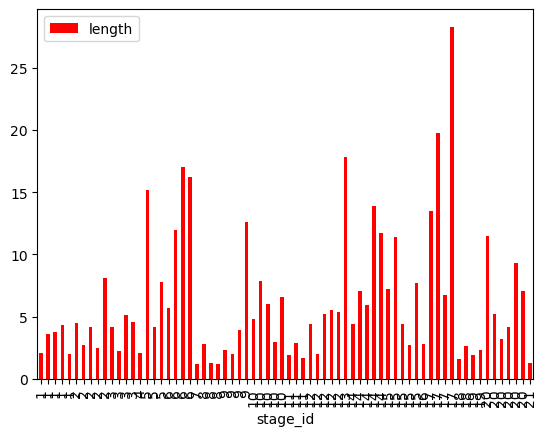

In [31]:
# crear una grafica de barras con los datos de los puertos de montaña de tour de france

import matplotlib.pyplot as plt

stages_climbs_df.plot(kind='bar',x='stage_id',y='length',color='red')

plt.show()



